<a href="https://colab.research.google.com/github/siddharthaborgohain/ML/blob/main/Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path="/content/drive/MyDrive/Colab Notebooks/bank marketing v2.csv"

In [9]:
df=pd.read_csv(path)

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,poutcome,deposit,p_recency
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,unknown,1,None
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,unknown,1,None
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,unknown,1,None
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,unknown,1,None
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,unknown,1,None


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  poutcome   11162 non-null  object
 13  deposit    11162 non-null  int64 
 14  p_recency  11162 non-null  object
dtypes: int64(5), object(10)
memory usage: 1.3+ MB


In [23]:
df.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [24]:
df.deposit.value_counts(normalize=True)

0    0.52616
1    0.47384
Name: deposit, dtype: float64

In [25]:
df.deposit=df.deposit.map({"yes":1,"no":0})

In [26]:
cat_cols=df.select_dtypes("object").columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'p_recency'],
      dtype='object')

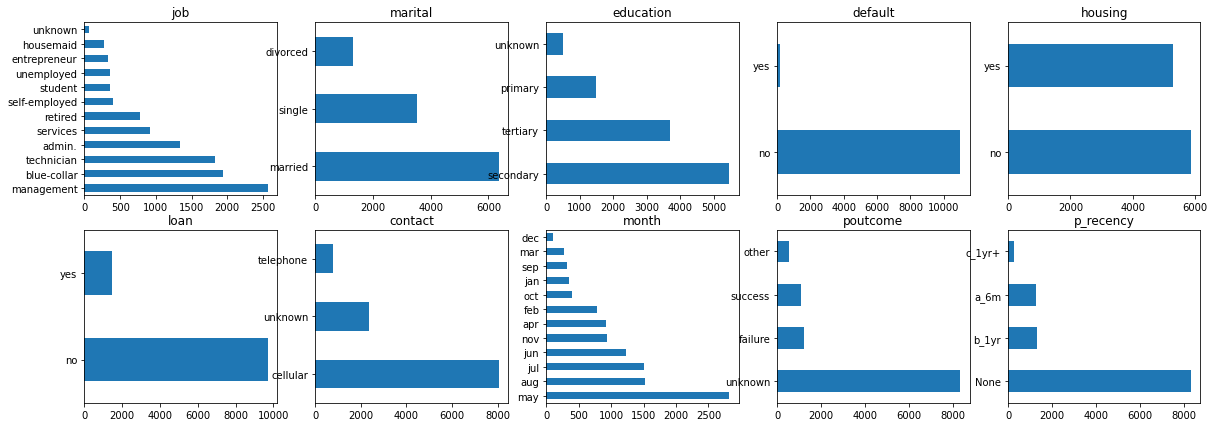

In [27]:
plt.figure(figsize=(20,7))
for i,j in enumerate(cat_cols):
  plt.subplot(2,5,i+1)
  df[j].value_counts().plot.barh()
  plt.title(j)
plt.show()

In [28]:
num_cols=df.select_dtypes("int64").columns
num_cols

Index(['age', 'balance', 'day', 'duration'], dtype='object')

In [30]:
df1=df.drop(['day', 'duration'],axis=1)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,poutcome,deposit,p_recency
0,59,admin.,married,secondary,no,2343,yes,no,unknown,may,unknown,NaN,None
1,56,admin.,married,secondary,no,45,no,no,unknown,may,unknown,NaN,None
2,41,technician,married,secondary,no,1270,yes,no,unknown,may,unknown,NaN,None
3,55,services,married,secondary,no,2476,yes,no,unknown,may,unknown,NaN,None
4,54,admin.,married,tertiary,no,184,no,no,unknown,may,unknown,NaN,None


In [31]:
num_cols=df1.select_dtypes("int64").columns
num_cols

Index(['age', 'balance'], dtype='object')

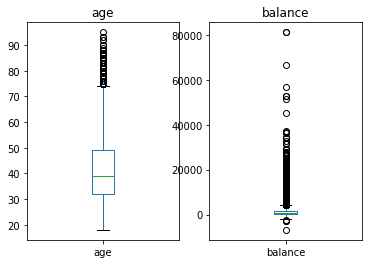

In [39]:
plt.figure(figsize=[6,4])
for i,j in enumerate(num_cols):
    plt.subplot(1,2,1+i)
    df1[j].plot.box()
    plt.title(j)
plt.show()

In [40]:
def bin_map(a):
    return a.map({"no":0,"yes":1})

In [41]:
binary_col=["housing","default","loan"]

In [42]:
df1[binary_col]=df1[binary_col].apply(bin_map)

In [43]:
dummy=['job', 'marital', 'education', 'contact',
       'month', 'poutcome', 'p_recency']

In [44]:
df_dum=pd.get_dummies(df1[dummy],drop_first=True)
df_dum.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,p_recency_a_6m,p_recency_b_1yr,p_recency_c_1yr+
0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
